In [3]:
from IPython.core.display import display, HTML
display(HTML("""
<style>
.output {
    display: flex;
    align-items: center;
    text-align: center;
}
</style>
"""))
display(HTML("<style>.container { width:80% !important; }</style>"))
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [1]:
from IPython.display import Image,display,HTML
import io
import base64
import matplotlib
from matplotlib import gridspec
from numpy import *
import commands
from scipy.signal import find_peaks_cwt
#import matplotlib.pylab as plt
%matplotlib inline
%pylab inline
#from bokeh.plotting import figure, show, output_file
#import bokeh.plotting as bp
#bp.output_notebook()
from itertools import tee, izip
#from matplotlib import rc
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
#rc('text', usetex=True)
#plt.rc('text', usetex=True)



Populating the interactive namespace from numpy and matplotlib


# EEG Motor Movement/Imagery Dataset

This data set consists of over 1500 one- and two-minute EEG recordings, obtained from 109 volunteers, as described below.

## Experimental Protocol

Subjects performed different motor/imagery tasks while 64-channel EEG were recorded using the BCI2000 system (http://www.bci2000.org). Each subject performed 14 experimental runs: two one-minute baseline runs (one with eyes open, one with eyes closed), and three two-minute runs of each of the four following tasks:

1. A target appears on either the left or the right side of the screen. The subject opens and closes the corresponding fist until the target disappears. Then the subject relaxes.
2. A target appears on either the left or the right side of the screen. The subject imagines opening and closing the corresponding fist until the target disappears. Then the subject relaxes.
3. A target appears on either the top or the bottom of the screen. The subject opens and closes either both fists (if the target is on top) or both feet (if the target is on the bottom) until the target disappears. Then the subject relaxes.
4. A target appears on either the top or the bottom of the screen. The subject imagines opening and closing either both fists (if the target is on top) or both feet (if the target is on the bottom) until the target disappears. Then the subject relaxes.

In summary, the experimental runs were:

1.Baseline, eyes open 

2.Baseline, eyes closed

3.Task 1 (open and close left or right fist)

4.Task 2 (imagine opening and closing left or right fist)

5.Task 3 (open and close both fists or both feet)

6.Task 4 (imagine opening and closing both fists or both feet)

7.Task 1

8.Task 2

9.Task 3

10.Task 4

11.Task 1

12.Task 2

13.Task 3

14.Task 4

The data are provided here in EDF+ format (containing 64 EEG signals, each sampled at 160 samples per second, and an annotation channel). For use with PhysioToolkit software, rdedfann generated a separate PhysioBank-compatible annotation file (with the suffix .event) for each recording. The .event files and the annotation channels in the corresponding .edf files contain identical data.
Each annotation includes one of three codes (T0, T1, or T2):

**·** T0 corresponds to rest

**·** T1 corresponds to onset of motion (real or imagined) of the left fist (in runs 3, 4, 7, 8, 11, and 12) both fists (in runs 5, 6, 9, 10, 13, and 14)

**·** T2 corresponds to onset of motion (real or imagined) of the right fist (in runs 3, 4, 7, 8, 11, and 12) both feet (in runs 5, 6, 9, 10, 13, and 14)

In the BCI2000-format versions of these files, which may be available from the contributors of this data set, these annotations are encoded as values of 0, 1, or 2 in the TargetCode state variable.

## Montage

The EEGs were recorded from 64 electrodes as per the international 10-10 system (excluding electrodes Nz, F9, F10, FT9, FT10, A1, A2, TP9, TP10, P9, and P10), as shown below (and in this PDF figure). The numbers below each electrode name indicate the order in which they appear in the records; note that signals in the records are numbered from 0 to 63, while the numbers in the figure range from 1 to 64.

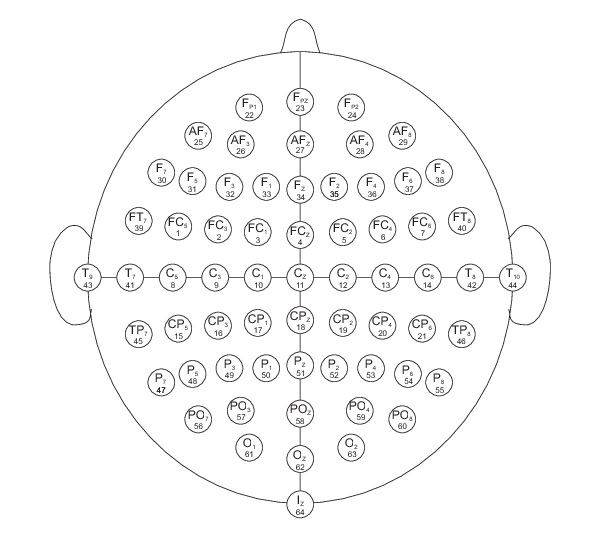

In [2]:
Image(filename='../64_channel_sharbrough.png')

## Analysis of experimental data

The first set of analysis has been performed over some test individuals. Data has been analysed in terms of Power Spectral density calculation over raw data and smoothed data (Savitzky-Golay filter). It has not yet been filtered in terms of band-pass filters and, therefore, some high frequency artifacts are present in PSDs for some of the recordings.

The first analysis conducted are focused on the situations in which the subjects of study are in an **eyes-closed** and an **eyes-open** scenario. This will be the basiss of the ulterior analysis for the different motor movement/imaginery tasks.

### Raw data vs smooth data

### Eyes closed

#### Time traces

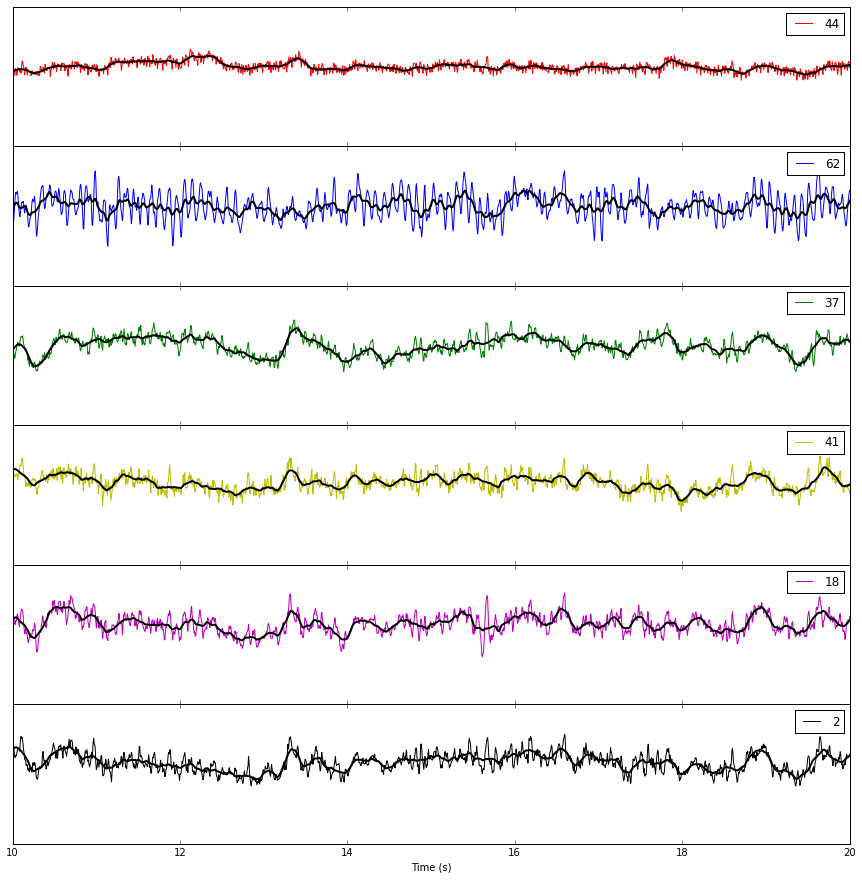

In [5]:
fig,ax = plt.subplots(6,1,sharex=True,sharey=True)
fig.subplots_adjust(hspace=0)
fig.set_figheight(15)
fig.set_figwidth(15)
subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
dt = 0.00005 #0.033
left  = 0.125  # the left side of the subplots of the figure
right = 0.9    # the right side of the subplots of the figure
bottom = 0.1   # the bottom of the subplots of the figure
top = 0.9      # the top of the subplots of the figure
wspace = 0.2   # the amount of width reserved for blank space between subplots
hspace = 0.5   # the amount of height reserved for white space between subplots
#ret = commands.getoutput("wc -l ../../Simulations/AGENT/PERISTALSIS/Python/All_9.dat | cut  -f1  -d ' '")
fps = 20.0
one_min = 60.0
array_colors=['r','b','g','y','m','k']
#Exp_calc = np.loadtxt('../EXPD50SP11_SP12/SP11#1/+fact/E2/New_Project/sp11_d50_e2/data/Traces.dat',unpack=True,dtype=np.float64)
#Exp_calc = np.genfromtxt('../EXPD50SP11_SP12/SP11#1/+fact/E2/New_Project/sp11_d50_e2/data/Traces.dat',delimiter='\t',unpack=True,dtype=np.float64)
Exp_calc_raw = np.loadtxt('../Eyes_closed/S001/S001R02_data.txt',unpack=True,skiprows=1,delimiter=',',dtype=np.float64)
Exp_calc_smooth = np.loadtxt('../Eyes_closed/S001/S001R02_data_smoothed.txt',unpack=True,delimiter=',',dtype=np.float64)

time_raw = Exp_calc_raw[0]
time_smooth = Exp_calc_smooth[0]
nNodes=[randint(1,65) for p in range(0,6)]
for i in range(6):
    ax[i].plot(time_raw,Exp_calc_raw[nNodes[i]],color=array_colors[i],lw=1,label='%s' %nNodes[i])
    ax[i].plot(time_raw,Exp_calc_smooth[nNodes[i]],color='k',lw=2)
    ax[i].legend()
plt.yticks([])
plt.xlim([10,20])
plt.xlabel('Time (s)')


#### Spectral map for eyes closed (subject S001)

### ALPHA (~10.2Hz)

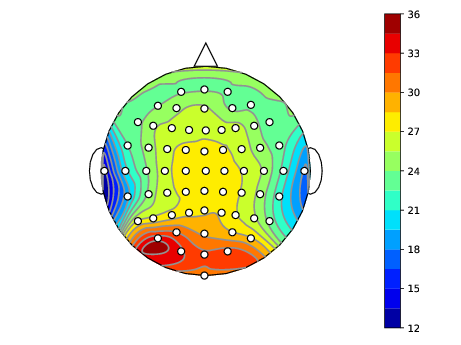

In [6]:
Image(filename='../Tasks_spectra/Eyes_closed/S001/Topographic_EEG_alpha.png')

### GAMMA (~40.2Hz)

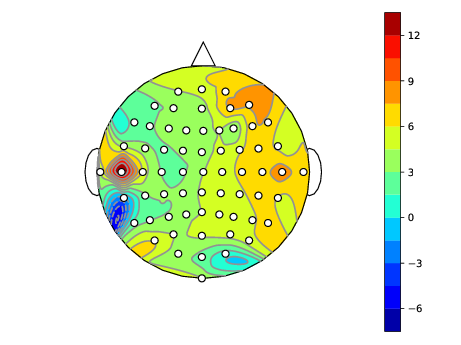

In [7]:
Image(filename='../Tasks_spectra/Eyes_closed/S001/Topographic_EEG_gamma.png')

### Synchronization patterns for eyes closed

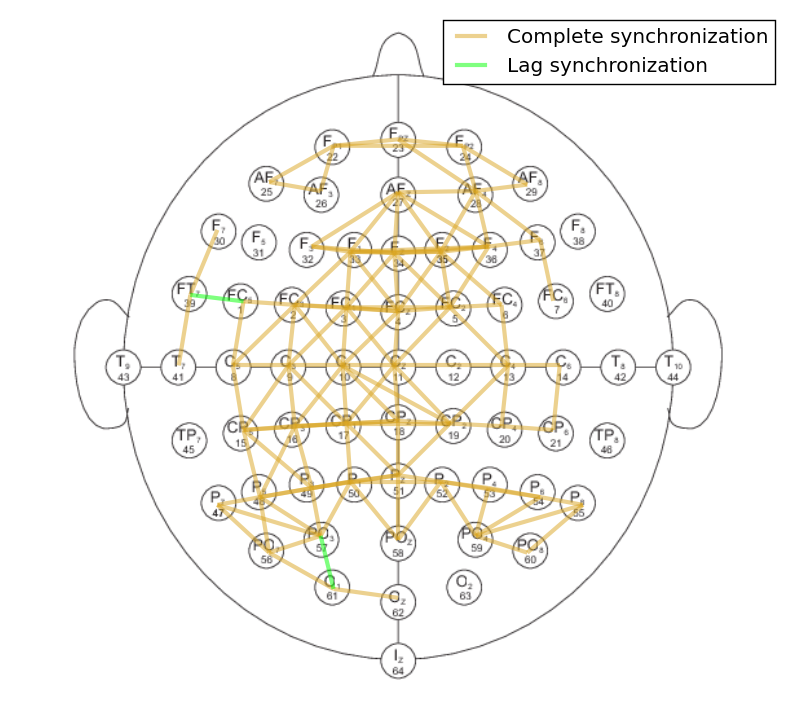

In [8]:
Image(filename='../Eyes_closed/S001/Network_Reconstructed_XCORR_PHASE_LAG_Thresh_1.png',width=400,height=400)

# ----------------------------------------------------------------------------------------------------------------------------#
#### Spectral map for eyes opened (subject S001)

### ALPHA (~10.2Hz)

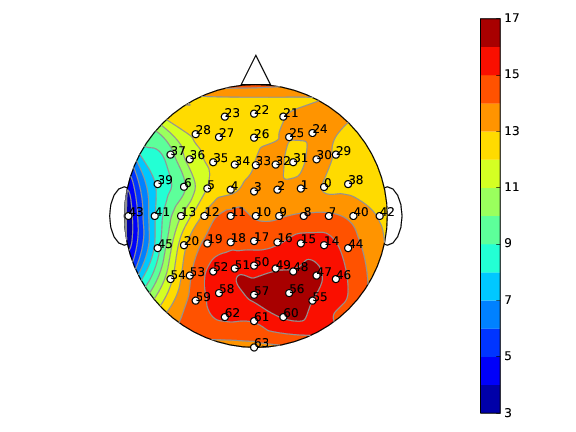

In [10]:
Image(filename='../Tasks_spectra/Eyes_opened/S001/Topographic_EEG_alpha.png')

### GAMMA (~40.2Hz)

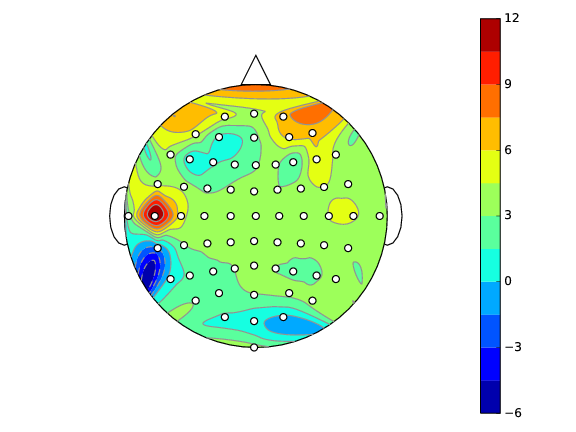

In [11]:
Image(filename='../Tasks_spectra/Eyes_opened/S001/Topographic_EEG_gamma.png')

### Synchronization patterns for eyes opened

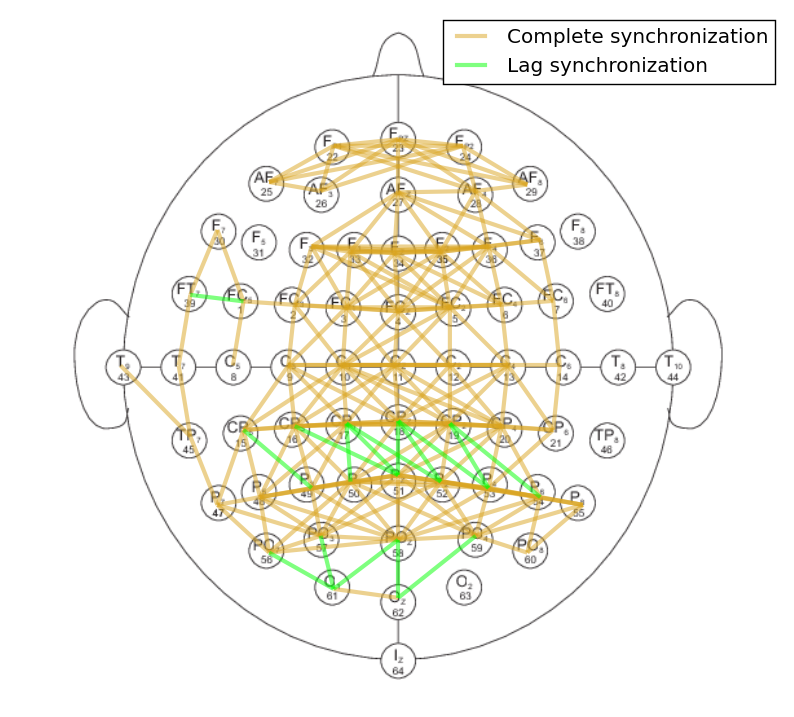

In [12]:
Image(filename='../Eyes_opened/S001/Network_Reconstructed_XCORR_PHASE_LAG_Thresh_1.png',width=400,height=400)

# ----------------------------------------------------------------------------------------------------------------------------#

# Task 1 (open and close left or right fist)

This first task consists on opening or closing right or left fist upon the presentation of a visual cue. **T0** corresponds to **rest (close fist)** whereas **T1** corresponds to **opening the left fist** and **T2** corresponds to **opening the right fist**.

The first analysis to perform is computing the **Phase-locking value** between each pair of electrodes for each epoch. The epochs are of **4.5s** length and correspond to the onset or relaxation of movement.

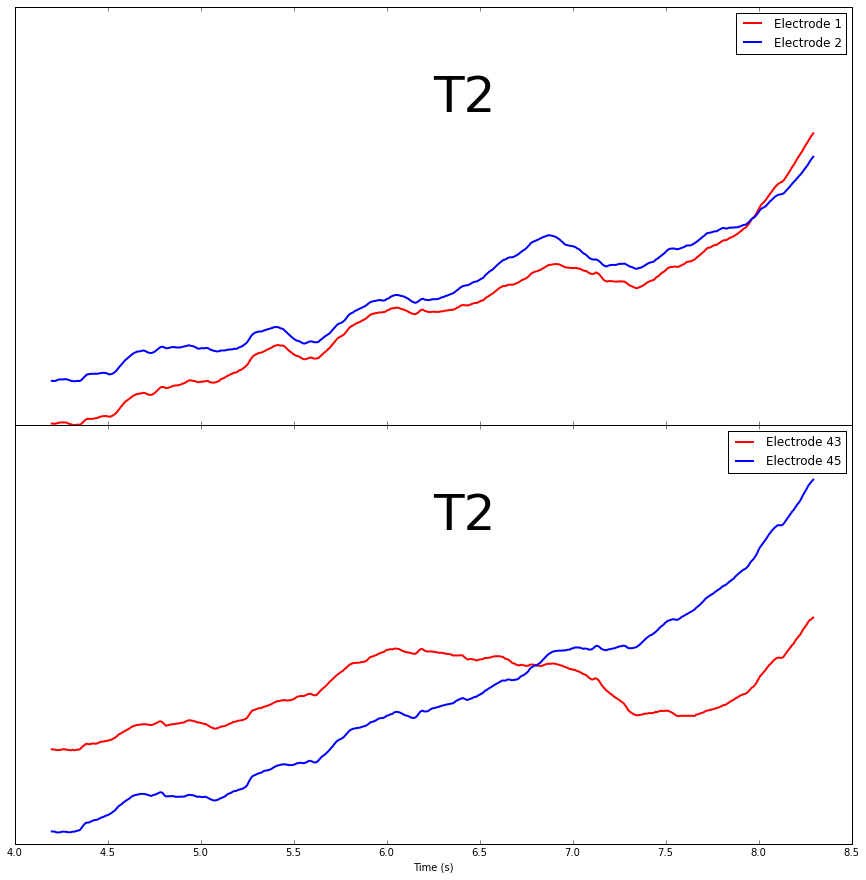

In [6]:
fig,ax = plt.subplots(2,1,sharex=True,sharey=True)
fig.subplots_adjust(hspace=0)
fig.set_figheight(15)
fig.set_figwidth(15)
subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
dt = 0.00005 #0.033
left  = 0.125  # the left side of the subplots of the figure
right = 0.9    # the right side of the subplots of the figure
bottom = 0.1   # the bottom of the subplots of the figure
top = 0.9      # the top of the subplots of the figure
wspace = 0.2   # the amount of width reserved for blank space between subplots
hspace = 0.5   # the amount of height reserved for white space between subplots
#ret = commands.getoutput("wc -l ../../Simulations/AGENT/PERISTALSIS/Python/All_9.dat | cut  -f1  -d ' '")
fps = 20.0
one_min = 60.0
array_colors=['r','b','g','y','m','k']
#Exp_calc = np.loadtxt('../EXPD50SP11_SP12/SP11#1/+fact/E2/New_Project/sp11_d50_e2/data/Traces.dat',unpack=True,dtype=np.float64)
#Exp_calc = np.genfromtxt('../EXPD50SP11_SP12/SP11#1/+fact/E2/New_Project/sp11_d50_e2/data/Traces.dat',delimiter='\t',unpack=True,dtype=np.float64)
Exp_calc_raw = np.loadtxt('../Task_1/S001/S001R03_data.txt',unpack=True,skiprows=1,delimiter=',',dtype=np.float64)
Exp_calc_smooth = np.loadtxt('../Task_1/S001/S001R03_data_smoothed.txt',unpack=True,delimiter=',',dtype=np.float64)
Annotations =  np.genfromtxt('../Task_1/S001/S001R03_annotations.txt',unpack=True,delimiter=',', usecols = (0,1,2),dtype=('|S4','<f8','|S4'), skip_header=1)
dt = time_smooth[1]-time_smooth[0]
#time_raw = Exp_calc_raw[0]
time_smooth = Exp_calc_smooth[0]
index = 1
Range = int( (float(Annotations[index][0])/dt)+(float(Annotations[index][1])/dt) ) 
first_index = int(float(Annotations[index][0])/dt)
Center_of_epoch = float(Annotations[index][0])+float(Annotations[index][1])/2

ax[0].annotate('%s' %Annotations[index][2],xy=(Center_of_epoch, 50), xytext=(Center_of_epoch, 50),fontsize=50)
ax[1].annotate('%s' %Annotations[index][2],xy=(Center_of_epoch, 50), xytext=(Center_of_epoch, 50),fontsize=50)
nNodes=[randint(1,65) for p in range(0,6)]
Nodes_sync = [1,2]
Nodes_not_sync = [43,45]
for i in range(2):
#ax[i].plot(time_raw,Exp_calc_raw[nNodes[i]],color=array_colors[i],lw=1,label='%s' %nNodes[i])
    ax[0].plot(time_smooth[first_index:Range],Exp_calc_smooth[Nodes_sync[i]][first_index:Range],color=array_colors[i],lw=2,label='Electrode %s' %Nodes_sync[i])
    ax[1].plot(time_smooth[first_index:Range],Exp_calc_smooth[Nodes_not_sync[i]][first_index:Range],color=array_colors[i],lw=2,label='Electrode %s' %Nodes_not_sync[i])
    
    ax[0].legend()
    ax[1].legend()
plt.yticks([])
#plt.xlim([10,20])
plt.xlabel('Time (s)')



0.557647002229


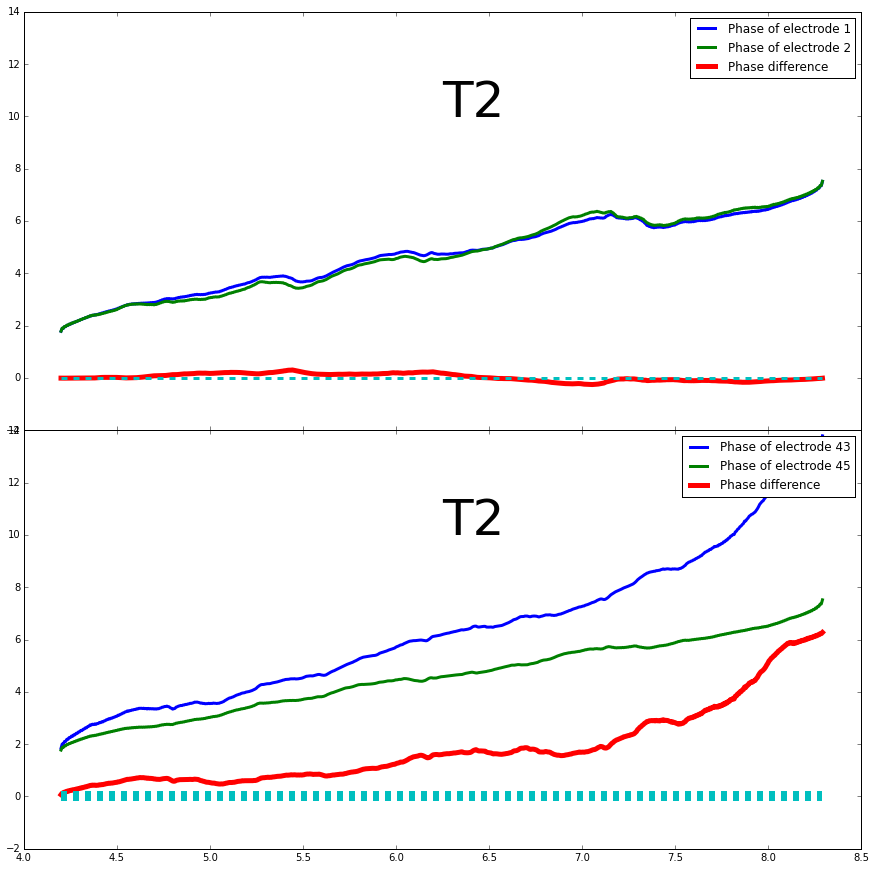

In [7]:
from scipy import *
from scipy.signal import hilbert
#print unwrap(angle(hilbert(Exp_calc_smooth[1][first_index:Range]-Exp_calc_smooth[1][first_index:Range].mean())))

Angle_1 = unwrap(angle(hilbert(Exp_calc_smooth[1][first_index:Range]-Exp_calc_smooth[1][first_index:Range].mean())))
Angle_2 = unwrap(angle(hilbert(Exp_calc_smooth[2][first_index:Range]-Exp_calc_smooth[2][first_index:Range].mean())))

Angle_3 = unwrap(angle(hilbert(Exp_calc_smooth[43][first_index:Range]-Exp_calc_smooth[43][first_index:Range].mean())))
Angle_4 = unwrap(angle(hilbert(Exp_calc_smooth[45][first_index:Range]-Exp_calc_smooth[45][first_index:Range].mean())))

fig,ax = plt.subplots(2,1,sharex=True,sharey=True)
fig.subplots_adjust(hspace=0)
fig.set_figheight(15)
fig.set_figwidth(15)
subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
dt = 0.00005 #0.033
left  = 0.125  # the left side of the subplots of the figure
right = 0.9    # the right side of the subplots of the figure
bottom = 0.1   # the bottom of the subplots of the figure
top = 0.9      # the top of the subplots of the figure
wspace = 0.2   # the amount of width reserved for blank space between subplots
hspace = 0.5   # the amount of height reserved for white space between subplots

ax[0].plot(time_smooth[first_index:Range],Angle_1,lw=3,label='Phase of electrode 1')
ax[0].plot(time_smooth[first_index:Range],Angle_2,lw=3,label='Phase of electrode 2')
ax[0].plot(time_smooth[first_index:Range],Angle_1-Angle_2,lw=5,label='Phase difference')
ax[0].plot(time_smooth[first_index:Range],zeros(len(time_smooth[first_index:Range])),'--',lw=3)
ax[0].legend()
ax[1].plot(time_smooth[first_index:Range],Angle_3,lw=3,label='Phase of electrode 43')
ax[1].plot(time_smooth[first_index:Range],Angle_4,lw=3,label='Phase of electrode 45')
ax[1].plot(time_smooth[first_index:Range],Angle_3-Angle_4,lw=5,label='Phase difference')
ax[1].plot(time_smooth[first_index:Range],zeros(len(time_smooth[first_index:Range])),'--',lw=10)
ax[1].legend()
ax[0].annotate('%s' %Annotations[index][2],xy=(Center_of_epoch, 10), xytext=(Center_of_epoch, 10),fontsize=50)
ax[1].annotate('%s' %Annotations[index][2],xy=(Center_of_epoch, 10), xytext=(Center_of_epoch, 10),fontsize=50)

print abs(sum(exp((Angle_3-Angle_4)*1j))/len(Angle_1))

The whole experiment can be divided into chunks depending on the task demanded to perform. In the following plot a pair of neurons go from synchronization to no synchronization depending on the "input state" T0, T1 or T2.

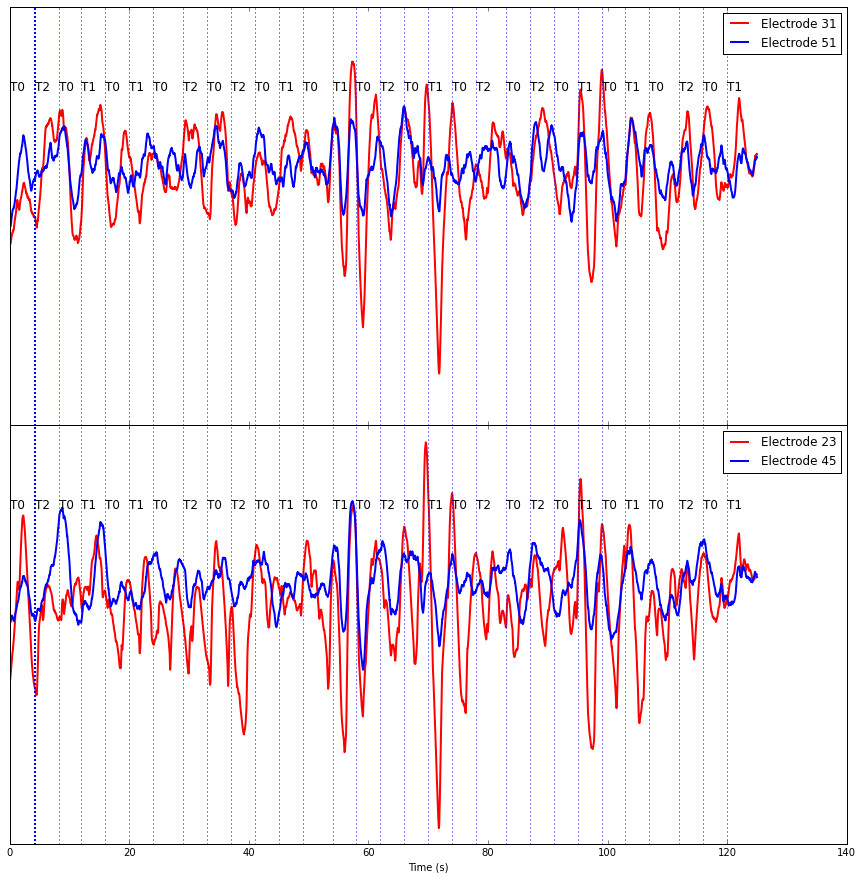

In [8]:
fig,ax = plt.subplots(2,1,sharex=True,sharey=True)
fig.subplots_adjust(hspace=0)
fig.set_figheight(15)
fig.set_figwidth(15)
subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
dt = 0.00005 #0.033
left  = 0.125  # the left side of the subplots of the figure
right = 0.9    # the right side of the subplots of the figure
bottom = 0.1   # the bottom of the subplots of the figure
top = 0.9      # the top of the subplots of the figure
wspace = 0.2   # the amount of width reserved for blank space between subplots
hspace = 0.5   # the amount of height reserved for white space between subplots
#ret = commands.getoutput("wc -l ../../Simulations/AGENT/PERISTALSIS/Python/All_9.dat | cut  -f1  -d ' '")
fps = 20.0
one_min = 60.0
array_colors=['r','b','g','y','m','k']
#Exp_calc = np.loadtxt('../EXPD50SP11_SP12/SP11#1/+fact/E2/New_Project/sp11_d50_e2/data/Traces.dat',unpack=True,dtype=np.float64)
#Exp_calc = np.genfromtxt('../EXPD50SP11_SP12/SP11#1/+fact/E2/New_Project/sp11_d50_e2/data/Traces.dat',delimiter='\t',unpack=True,dtype=np.float64)
#Exp_calc_raw = np.loadtxt('../Task_1/S001/S001R03_data.txt',unpack=True,skiprows=1,delimiter=',',dtype=np.float64)
Exp_calc_smooth = np.loadtxt('../Task_1/S001/S001R03_data_smoothed.txt',unpack=True,delimiter=',',dtype=np.float64)
Annotations =  np.genfromtxt('../Task_1/S001/S001R03_annotations.txt',unpack=True,delimiter=',', usecols = (0,1,2),dtype=('|S4','<f8','|S4'), skip_header=1)
dt = time_smooth[1]-time_smooth[0]
#time_raw = Exp_calc_raw[0]
time_smooth = Exp_calc_smooth[0]
index = 1
Range = int( (float(Annotations[index][0])/dt)+(float(Annotations[index][1])/dt) ) 
first_index = int(float(Annotations[index][0])/dt)
Center_of_epoch = float(Annotations[index][0])+float(Annotations[index][1])/2

nNodes=[randint(1,65) for p in range(0,6)]
Nodes_sync = [31,51]
Nodes_not_sync = [23,45]
for i in range(2):
#ax[i].plot(time_raw,Exp_calc_raw[nNodes[i]],color=array_colors[i],lw=1,label='%s' %nNodes[i])
    ax[0].plot(time_smooth,Exp_calc_smooth[Nodes_sync[i]],color=array_colors[i],lw=2,label='Electrode %s' %Nodes_sync[i])
    ax[1].plot(time_smooth,Exp_calc_smooth[Nodes_not_sync[i]],color=array_colors[i],lw=2,label='Electrode %s' %Nodes_not_sync[i])
    ax[0].legend()
    ax[1].legend()
plt.yticks([])
#plt.xlim([10,20])
plt.xlabel('Time (s)')
for k in range(len(Annotations)):
    ax[0].axvline(float(Annotations[k][0]),ls=':',lw=1)
    ax[0].axvline(float(Annotations[k][1]),ls=':',lw=1)

    ax[1].axvline(float(Annotations[k][0]),ls=':',lw=1)
    ax[1].axvline(float(Annotations[k][1]),ls=':',lw=1)
    Center_of_epoch = float(Annotations[k][0])#+float(Annotations[k][1])/2
    ax[0].annotate('%s' %Annotations[k][2],xy=(Center_of_epoch, 70), xytext=(Center_of_epoch, 70),fontsize=12)
    ax[1].annotate('%s' %Annotations[k][2],xy=(Center_of_epoch, 70), xytext=(Center_of_epoch, 70),fontsize=12)




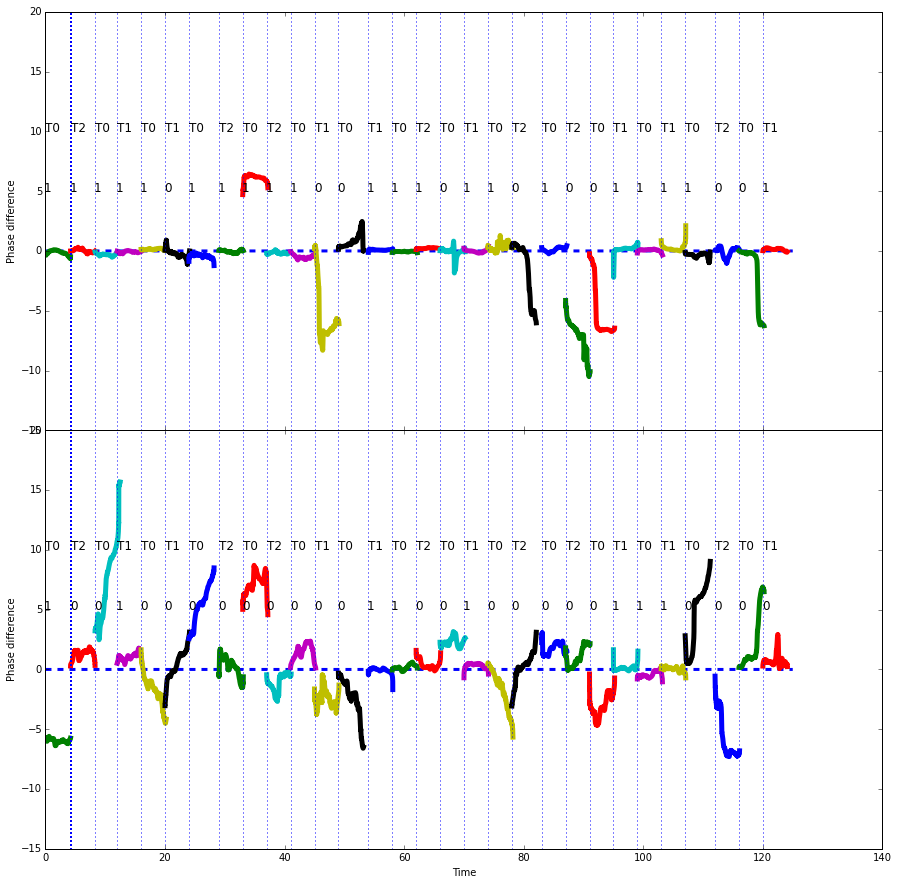

In [11]:


fig,ax = plt.subplots(2,1,sharex=True,sharey=True)
fig.subplots_adjust(hspace=0)
fig.set_figheight(15)
fig.set_figwidth(15)
subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
dt = 0.00005 #0.033
left  = 0.125  # the left side of the subplots of the figure
right = 0.9    # the right side of the subplots of the figure
bottom = 0.1   # the bottom of the subplots of the figure
top = 0.9      # the top of the subplots of the figure
wspace = 0.2   # the amount of width reserved for blank space between subplots
hspace = 0.5   # the amount of height reserved for white space between subplots

#ax[0].plot(time_smooth,Angle_1,lw=3,label='Phase of electrode 1')
#ax[0].plot(time_smooth,Angle_2,lw=3,label='Phase of electrode 2')

ax[0].plot(time_smooth,zeros(len(time_smooth)),'--',lw=3)
ax[0].legend()
#ax[1].plot(time_smooth,Angle_3,lw=3,label='Phase of electrode 43')
#ax[1].plot(time_smooth,Angle_4,lw=3,label='Phase of electrode 45')
dt = time_smooth[1]-time_smooth[0]
ax[1].plot(time_smooth,zeros(len(time_smooth)),'--',lw=3)
ax[1].legend()
#print abs(sum(exp((Angle_1-Angle_2)*1j))/len(Angle_1))
for k in range(len(Annotations)):
    Center_of_epoch = float(Annotations[k][0])#+float(Annotations[k][1])/2
    
    Range = int( (float(Annotations[k][0])/dt)+(float(Annotations[k][1])/dt) ) 
    first_index = int(float(Annotations[k][0])/dt)
    Angle_1 = unwrap(angle(hilbert(Exp_calc_smooth[1][first_index:Range]-Exp_calc_smooth[1][first_index:Range].mean())))
    Angle_2 = unwrap(angle(hilbert(Exp_calc_smooth[2][first_index:Range]-Exp_calc_smooth[2][first_index:Range].mean())))

    Angle_3 = unwrap(angle(hilbert(Exp_calc_smooth[23][first_index:Range]-Exp_calc_smooth[23][first_index:Range].mean())))
    Angle_4 = unwrap(angle(hilbert(Exp_calc_smooth[45][first_index:Range]-Exp_calc_smooth[45][first_index:Range].mean())))
    if abs(sum(exp((Angle_1-Angle_2)*1j))/len(Angle_1))<0.95:
        ax[0].annotate('0' ,xy=(Center_of_epoch, 10), xytext=(Center_of_epoch, 5),fontsize=12)
    elif abs(sum(exp((Angle_1-Angle_2)*1j))/len(Angle_1))>0.95:
        ax[0].annotate('1' ,xy=(Center_of_epoch, 10), xytext=(Center_of_epoch, 5),fontsize=12)
    if abs(sum(exp((Angle_3-Angle_4)*1j))/len(Angle_3))<0.95:
        ax[1].annotate('0' ,xy=(Center_of_epoch, 10), xytext=(Center_of_epoch, 5),fontsize=12)
    elif abs(sum(exp((Angle_3-Angle_4)*1j))/len(Angle_3))>0.95:
        ax[1].annotate('1' ,xy=(Center_of_epoch, 10), xytext=(Center_of_epoch, 5),fontsize=12)
    ax[0].plot(time_smooth[first_index:Range],Angle_1-Angle_2,lw=5,label='Phase difference')
    ax[1].plot(time_smooth[first_index:Range],Angle_3-Angle_4,lw=5,label='Phase difference')
    
    ax[0].axvline(float(Annotations[k][0]),ls=':',lw=1)
    ax[0].axvline(float(Annotations[k][1]),ls=':',lw=1)

    ax[1].axvline(float(Annotations[k][0]),ls=':',lw=1)
    ax[1].axvline(float(Annotations[k][1]),ls=':',lw=1)
    
    ax[0].annotate('%s' %Annotations[k][2],xy=(Center_of_epoch, 10), xytext=(Center_of_epoch, 10),fontsize=12)
    ax[1].annotate('%s' %Annotations[k][2],xy=(Center_of_epoch, 10), xytext=(Center_of_epoch, 10),fontsize=12)
ax[1].set_xlabel('Time')
ax[0].set_ylabel('Phase difference')
ax[1].set_ylabel('Phase difference')
#plt.xlim([100,120])


## Comparison experiments - simulations

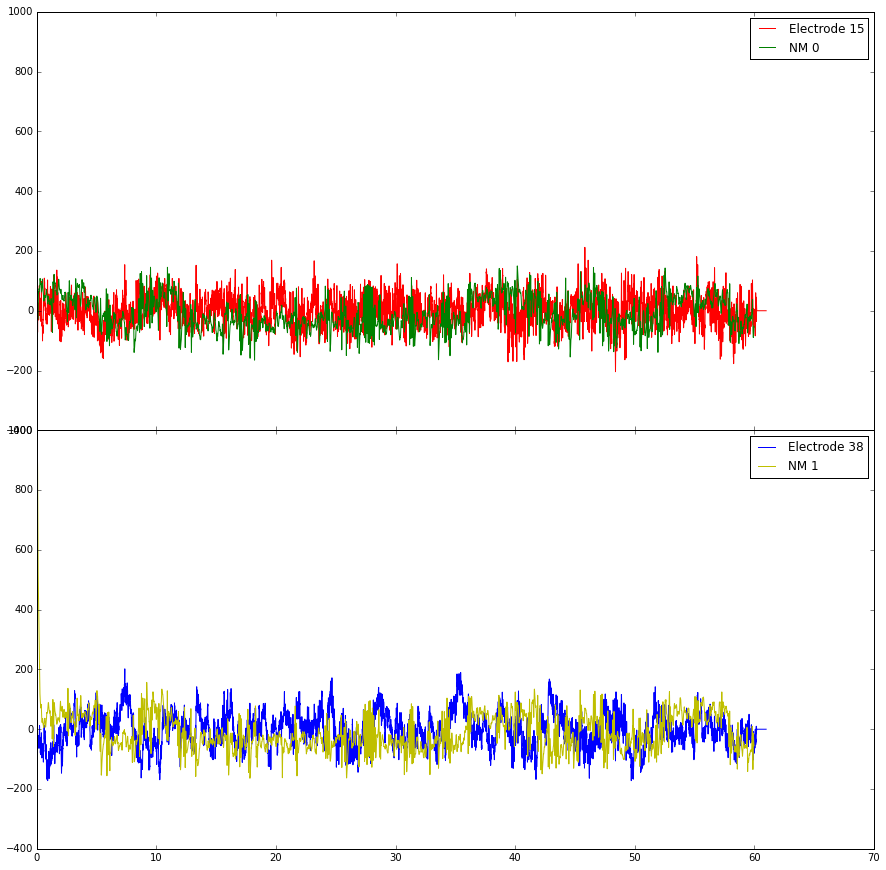

In [25]:
fig,ax = plt.subplots(2,1,sharex=True,sharey=True)
fig.subplots_adjust(hspace=0)
fig.set_figheight(15)
fig.set_figwidth(15)
subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
dt = 0.00005 #0.033
left  = 0.125  # the left side of the subplots of the figure
right = 0.9    # the right side of the subplots of the figure
bottom = 0.1   # the bottom of the subplots of the figure
top = 0.9      # the top of the subplots of the figure
wspace = 0.2   # the amount of width reserved for blank space between subplots
hspace = 0.5   # the amount of height reserved for white space between subplots

fps = 20.0
one_min = 60.0
array_colors=['r','b','g','y','m','k']
#Exp_calc = np.loadtxt('../EXPD50SP11_SP12/SP11#1/+fact/E2/New_Project/sp11_d50_e2/data/Traces.dat',unpack=True,dtype=np.float64)
#Exp_calc = np.genfromtxt('../EXPD50SP11_SP12/SP11#1/+fact/E2/New_Project/sp11_d50_e2/data/Traces.dat',delimiter='\t',unpack=True,dtype=np.float64)
Exp_calc_raw = np.loadtxt('../Eyes_closed/S001/S001R02_data.txt',unpack=True,skiprows=1,delimiter=',',dtype=np.float64)
Sim_raw = np.loadtxt('../../../../Simulations_Realistic_EEG/Motor_Task_EEG/Ursino/Output_0001/Output_alpha_05.00/Output_beta_05.00/Data_0030.dat',unpack=True,dtype=np.float64)
time_raw = Exp_calc_raw[0]
nNodes=[randint(1,65) for p in range(0,2)]
for i in range(2):
    ax[i].plot(time_raw,Exp_calc_raw[nNodes[i]],color=array_colors[i],lw=1,label='Electrode %s' %nNodes[i])
    ax[i].plot(Sim_raw[0],Sim_raw[i+1],lw=1,color=array_colors[i+2],label='NM %s' %i)
    ax[i].legend()